# Lab 3. Quetelet from error to *l'homme moyen*

Let's look at Letter XX of Quetelet's [*Letters addressed to H.R.H. the Grand Duke of Saxe Coburg and Gotha, on the theory of probabilities, as applied to the moral and political sciences*](https://babel.hathitrust.org/cgi/pt?id=njp.32101067206977), 
   
>THE Gladiator is certainly one of the most beautiful works of ancient sculpture. It is with reason that artists have studied its free and noble forms, and have often measured the principal dimensions of the head and of the body to obtain its proportions and its harmony. To measure a statue is not so easy an operation as might at first appear, particularly if it be desired to obtain very precise results. In measuring ten times in succession the circumference of the chest, we are not sure of finding two results identically the same. It almost always happens that the values obtained are more or less distant from that sought; and I even suppose the most favourable circumstances those where there is no tendency to make the measurements either too small or too great. If we had the courage to recommence a thousand times, we should in the end have a series of numbers differing from one another, according to the degree of precision exercised in their collection. The mean of all these numbers would certainly differ very little from the true value.

#### What are the claims being made here about measurement? What is the claim about the mean of a set of measurements?

Then Quetelet argues:
>Moreover, in classing all the measurements in order of magnitude, we should be not a little astonished to find the groups succeed one another with the greatest regularity. The measurements which differed the least from the general mean would compose the largest group; and the other groups would be so much the smaller as they contained measurements differing the more from this same mean. 

#### Can you explain these claims? What does it mean that the measurements "differing the least from the general mean" make up the "largest group"? 



Quetelet then discusses graphing the results of this process of measurement

>If the succession of groups were traced by a line, this line would be the curve of possibility: this result might in fact have been foreseen.

What is the curve of possibility of which M. Quetelet speaks?


![here](https://i.imgur.com/HLLxao3.png)



>If we had to measure the chest of a living person, instead of that of a statue, the chances of error would be much more numerous; and I much doubt whether, after a thousand measurements, we should still find a probable error of the twenty-fifth part of an inch. The single act of respiration, which causes each instant a variation of the form and dimension of the chest, would add a powerful cause of error to those which concur in operating on a perfectly motionless statue. Notwithstanding this disadvantage, the thousand measurements grouped in order of magnitude would yet proceed in a most regular manner. The line which represents them would always be the curve of possibility, but dilated in a horizontal direction in proportion to the probable error.

#### What's the argument here?



I think we can see where is this going. Let's look at Quetelet's data set--it's easily found the *Edinburgh Medical and Surgical Journal*, vol. 13, which the Google has made [available](https://books.google.com/books?id=R085AQAAMAAJ&pg=PA260#v=onepage&q&f=false).

Its data look so:
![data](https://i.imgur.com/NeNiwHc.png)


The author notes:
>For these very curious tables, we are indebted to an army contractor, a gentleman of great observation and singular accuracy. They furnish documents of much interest as to the comparative height and breadth of men in different counties in Scotland, from which inferences may be drawn as to the influence of the nature of the county and climate, food, and occupation, upon the growth of man.





Quetelet was interested just in such conclusions. But first he had to convert the data. He produces this [table](https://books.google.com/books?id=PV9BAQAAMAAJ&pg=PA276#v=onepage&q&f=false):

![table](https://i.imgur.com/ck5k6EM.png)




#### Look just at the first two columns. What did Quetelet have to do to produce those columns from the data published in 1817? Can you sketch very briefly some code for doing so? Or write down the proportion to calculate each row? (And does anyone know what this procedure is called in say, excel?)

In [8]:
chest_measurements = \
[(3,33), \
(18,34), \
(81,35), \
(185,36), \
(420,37), \
(749,38), \
(1073,39), \
(1079,40), \
(934,41), \
(658,42), \
(370,43), \
(92,44), \
(50,45), \
(21,46), \
(4,47), \
(1,48)]

In [9]:
chest_measurements

[(3, 33),
 (18, 34),
 (81, 35),
 (185, 36),
 (420, 37),
 (749, 38),
 (1073, 39),
 (1079, 40),
 (934, 41),
 (658, 42),
 (370, 43),
 (92, 44),
 (50, 45),
 (21, 46),
 (4, 47),
 (1, 48)]

(Note that in the code above the backslash says "treat the line below as if it was part of this line". We entered this data as a vertical row so it was easier for you to read.)

What's the problem with the data in this form? How does it have to change to perform most operations on it?

Loads of way to convert this into a more useable form! Here's one way:

In [10]:
# declare a blank list
chest_measure=[]

# write a for loop
for row in chest_measurements:  
    chest_measure=chest_measure+row[0]*[row[1]]  # Note the extra set of brackets around row 1 here!

In [11]:
# we need some more mathy functions, so we're going to import `numpy`
import numpy as np
np.sum(chest_measure)/len(chest_measure)

39.831822934820494

Why wouldn't this work with `chest_measurements`?

#### ASIDE: This is the first time we've seen a for loop in this class. First, what does a for loop do in general? Second, what does the particular for loop above do? Can someone take us through the first few loops?  
Hint: the "+" and asterisk symbols in the above loop are not just doing multiplication and addition. *They're doing list operations.* Sometimes the same symbol in a programming language does different things depending on the context in which it's used. Some times programmers call such symbols "overloaded operators". 

In [12]:
# import pandas library, denoting library as "pd"
import pandas as pd

# import a bit of ipython "magic" to get graphs to display in jupyter notebook
%pylab inline           

Populating the interactive namespace from numpy and matplotlib


In [13]:
# import list into pandas
normed_measurements=pd.DataFrame(chest_measure)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1480177470>]],
      dtype=object)

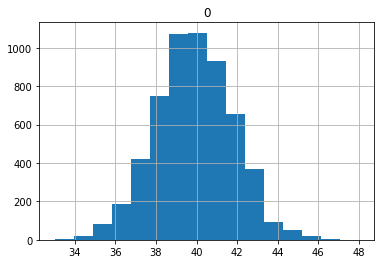

In [14]:
normed_measurements.hist(bins = 16)  # where number of bins = 16. If bin parameter not passed, default bin number = 10

...which sort of looks like a gaussian curve. How close is it? We can get the numerical information about the bin range and bin counts like this:

In [15]:
bin_range_and_counts = pd.cut(chest_measure, 16)    # generates bin information, given number of bins = 16
bin_range_and_counts.value_counts()                 # outputs bin ranges and counts

(32.985, 33.938]       3
(33.938, 34.875]      18
(34.875, 35.812]      81
(35.812, 36.75]      185
(36.75, 37.688]      420
(37.688, 38.625]     749
(38.625, 39.562]    1073
(39.562, 40.5]      1079
(40.5, 41.438]       934
(41.438, 42.375]     658
(42.375, 43.312]     370
(43.312, 44.25]       92
(44.25, 45.188]       50
(45.188, 46.125]      21
(46.125, 47.062]       4
(47.062, 48.0]         1
dtype: int64

From above, we can see the min/max of the bins is 32.985/48.0. For future reference, you can get the max bin count and a list of the bin counts like this:  

In [16]:
max_bin_count = bin_range_and_counts.value_counts().max()
print(max_bin_count)

bin_counts = bin_range_and_counts.value_counts().tolist()
print(bin_counts)

1079
[3, 18, 81, 185, 420, 749, 1073, 1079, 934, 658, 370, 92, 50, 21, 4, 1]


In practice, for our immediate concerns, we need only the bin range to construct a gaussian curve to overlay on this data. We need a slightly more powerful tool than pandas to make this graph, so we employ the matplotlib library. 

(Don't sweat the technical details of the code below too much. To summarize, we're using the equation for a gaussian to generate our gaussian curve given Quetelet's data. We're using the bin range information above to define the min and max x-range of the gaussian curve. Note that we normalized our data like Quetelet did such that the sum of all the bin "counts" in the historgram equals 1; likewise, the sum of all the area under the gaussian curve is equal to one.)

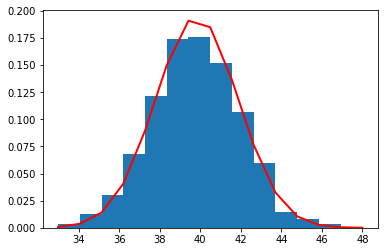

In [17]:
import numpy as np           
import matplotlib.pyplot as plt

# make a function to overlay a gaussian on data
def gaussian_curve(data, x):
    sigma = np.std(data) 
    mu = np.mean(data)
    plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
    return

# arrange data in a way the function above will recognize
min_range, max_range, number_of_bins = 32.985, 48.0, 15
x = np.linspace(min_range, max_range, 15)
plt.hist(chest_measure, x, normed=True)
gaussian_curve(chest_measure, x)
plt.show()

Noting the above, Quetelet argued:

>The example which I have cited merits, I think, great attention: it shows us that the results really occur, as though the chests which have been measured had been modelled from the same type from the same individual,—an ideal one if you will, but whose proportions we ascertain by a sufficiently long trial. If such were not the law of nature, the measurements would not (spite of their imperfections) group themselves with the astonishing symmetry which the law of possibility assigns them. Of the admirable laws which Nature attaches to the preservation of the species, I think I may put in the first rank that of maintaining the type. In my work on *La Physique Sociale*, I have already endeavoured to determine this type by the knowledge of the human mean. But if I mistake not, what experiment and reasoning had shown me, here takes the character of a mathematical truth. The human type, for men of the same race, and of the same age, is so well established that the differences between the results of observation and of calculation, notwithstanding the numerous accidental causes which might induce or exaggerate them, scarcely exceed those which unskilfulness may produce in a series of measurements taken on one individual. 

He continues:

>The difference which Nature makes in the heights of men is not greater than that which inexperience would produce in the measurements taken on one individual man in an attitude more or less curved. Everything occurs then as though there existed a type of man, from which all other men differed more or less. Nature has placed before our eyes living examples of what theory shows us.

## Quetelet and constant Causes

#### What does the analogy of measuring one statue and measuring a bunch of soldiers get him? What has he wrought?



Derosières on Quetelet
>Quetelet distinguished three kinds of mean values, the presentation of which would provide the core of numerous statistical debates until the beginning of the twentieth century. When Adolphe Bertillon (1876) presented these distinctions thirty years after Quetelet, he designated them quite clearly. The *objective* mecm corresponded to a real object, subjected to a certain number of measurements. The *subjective* mean resulted from the calculation of a central tendency, in the case in which the distribution presented a form adjustable to that of the “binomial law” (the case of heights). Only these two cases really deserved the term “mean value.” The third case presented itself as if the distribution did not have this “normal” form at all. Bertillon termed it an arithmetical mcan to emphasize the fact that it was pure fiction (the example he gave was that of the height of the houses in a street, without any such distribution being offered in support), whereas in the second case, the normal form of a frequency histogram attests to the existence of an underlying perfection in the multiplicity of cases, justifying the calculation of a “true” mean value.

### From physical to moral

>The second crucial connection in Quetelet’s construct allowed him to associate moral behavior with the physical attributes previously studied. Indeed, both moral and physical attributes present on average, as has been seen, an important regularity, if one only considers the masses. The average heights and forms of the human body show little variety, and that is explained by the law of large numbers, if the diversity of individual cases is interpreted in terms of realizations deviating at random from a model, according to a sum of numerous, small, independent causes. If therefore the heights of individual men are rather far apart, the average heights of two or more groups of men are actually quite close, if only these groups have been composed at random. *Now the numbers of marriages, crimes, or suicides present the same kind of stability, despite the highly individual and free nature of each of these three acts.* The connection between these two types of regularities, having to do with masses rather than singular cases, some with physical attributes and others with moral characteristics, allows us to clinch the argument: decisions of the moml type are manifes- tations of tendmcies distributed at random around average types. Com- bined, they constitute the moral attributes of the average man—an ideal intended by the Creator, and a symbol of perfection. [76-7, our italics]